# Decision Trees

A decision treee is a hierarchical, non parametric model for supervised learning whereby the local region is identified in a sequence of recursive splits in a smaller number of steps. A decision tree is composed of internal decision nodes and terminal leaf nodes(Figure 1.1).
Decision Tree Decision Algorithm starts from the tree node(root) and split the data on the feature that results in the largest Information Gain(IG).Based on the features of our training dataset, Decision Trees model learns a series of questions to infer the class labels of the examples.

![figure_1_1.png](images/figure_1_1.png)

Decision trees are tree like graph that models a question. An analogy for Decision trees is "twenty questions" where the player has to make guess about the object by saying out some specific names which could be related to the object. Then the opponent replies with 'yes' or 'no'. Based on the features(names)and opponent 'yes' or 'no' , a player tries to model the object and give a specific name of object at the end and wins the game if the player correctly predicts the object.


The interior nodes of decision trees test features.The training instances are divided into the subsets based on the outcomes of the test.For example,in figure 1.1 a node may test a variable 'outlook' is  'sunny' or not and if yes then the outcome would be 'Go to Beach'. These tests are carried out until a stopping criteria is reached. When a decision tree has been created, making a prediction for test data requires following the edges until a leaf node is reached.   

![figure_1_4.png](images/figure_1_4.png)

Let us look at a dataset given above where we have to categorize to animal species cat and dog based on their features which are plays_fetch, grumpy and favourite food. Play_fetch and grumpy have Yes/No values where as favourite food has Bacon, Dog Food and cat food. Decision tree examines features at each node. A first node would ask if an animal plays fetch or not. If the answer is yes, we will follow  the edge that leads to the left internal node otherwise to the right internal node. As we keep on questioning the featured values, based on some answer we will end to leaf node which will decide if the species is cat or Dog. 

From the above dataset, we can see that most dogs love to play fetch and are less grumpier than cat. Dogs love dog food and bacon whereas cat loves catfood and bacon. We can easily convert the categorical variable in the given dataset which encoders(Beginner module chapter 4).These rules can be very much difficult to make using pen and paper and therefore we will using python scikit learn libraries. 

In the upcoming section, we are going to build a tree for the above given dataset using an algorithm called Iterative Dichotomiser3(ID3). ID3 algorithm sets a feature as root node and splits the selected feature to produce the subsets of the data.For each subset, it calculates the entropy or Information gain and selects the particular output which results in maximum Information Gain(IG). The algorithm performs the similar operation on all the features which was not selected before. 

## Entropy

Now we know that decision tree test the feature values by making questions, but still we are unknown what features should be tested first. Let us look at two different scatterplots for two different dataset in the figure below. The scatterplot consist of two features: feature 1 and feature 2. Both of the dataset consists of two classes:red and green. A dotted line known as decision boundary splits the dataset so that the region separated by the boundary consists with maximum data points of the particular class. If we observe the left hand side plot, the blue dotted line has perfectly splitted the red and green class. What kind of feature test question could be made from this plot ? If feature1<2.5 , class =red otherwise class=green.So we donot need feature 2 to infer about the threshold.

However if we look at the scatterplot on the right hand side, some datapoints from both classes have almost overlapped. So which one would be the best split. If you assume the blue one is the best split , then you have perfect region for green class but some red class sample points are present too in the green classes. If we choose the orange has a decision boundary then some green class samples has showed up in the red class region . 

To resolve the issue above we take the help of Entropy. Entropy can be use to quantify the uncertainty.The test that reduces our uncertainty about the classification are the best.Entropy are measured in bits and  can be expressed as
$$\text{H(X)} = -\sum_{i=1}^n P(X_{i})\log_{2} P(X_{i})  $$
where n is the number of outcome
 and $P(X_{i})$ is the probability of outcome i.

![figure_1_5.png](images/figure_1_5.png)

As an example, lets us take a fair coin and toss it in the air. The probability of getting head is 0.5 and also probability of getting tail is 0.5. The entropy of coin toss is 

$H(X)=-(0.5log_{2}0.5+0.5log_{2}0.5)=1$

So only 1 bit is required to encode the outcome which could be 1=head 0= tail or the otherway round. So we are certain that there will be two outcomes.However if we take a biased coin with $P(H)=0.8$ and $P(T)=0.2$, the entropy for coin toss is 

$H(X)=-(0.8log_{2}0.8+0.2log_{2}0.2)=0.72$

The entropy is a fraction of 1 bit which still has two outcomes head and tail, however head occuring most of the time.

let us the take the dataset of cat and dog classification problem in the example above. Our training dataset consists of unequal number of classes with 6 dogs and 8 cats. If we just the number of animals present in the dataset and nothing else, just like the coin toss, we can calculate the entropy of decision/choice as 

$H(X)=-(\frac{6}{14}log_{2}\frac{6}{14}+\frac{8}{14}log_{2}\frac{8}{14})=0.9852$.

So we are still uncertain about the outcome because the amount of cats are higher than the dog. 

Now we would use the feature information to classify the animals from the dataset and split the data based on the animal that  plays fetch and which doesnot. So we have 9 samples that doesnot play fetch and 5 samples that play fetch. In 9 samples, 7 samples belongs to class Dog and 2 sample belonging to class Cat. Out of  5 samples which play fetch, 4 samples belongs to Dog and 1 sample belonging to class Cat.
The entropy at the node leading with play fetch=No  is 

$H(X)=-(\frac{2}{9}log_{2}\frac{2}{9}+\frac{7}{9}log_{2}\frac{7}{9})=0.76$.

The  entropy at the node leading with play fetch=Yes is 

$H(X)=-(\frac{1}{5}log_{2}\frac{1}{5}+\frac{4}{5}log_{2}\frac{4}{5})=0.72$.


Similary you proceed with the same manner to test other two features. I am not going to present the calculation steps for other two features but if you want to do it please free to do it by yourself. The chart below contains the entropy result from each of the test features. 

![figure_1_6.png](images/figure_1_6.png)

## Information Gain 

Based on the different feature split on the dataset , we would  have different entropy for each split. Now the next question arises, which of these splits reduces out uncertainty. If we average the entropy across the different feature, the subset produced by the test question favourite food gives the lowest average entropy=$\frac{1}{2}(0.8113+0)$. However this way of calculating the average of entropy across the feature and taking the minimum might not result in optimal tree.

We know that higher the entropy, the more mixed up the data is and therefore we have to  reorganize the data so as to minimize the entropy.Reorganizing was done based on the feature split.When we splited the dataset on the features there was also change in the information. The change in the information before and after the split is known as the information Gain(IG).

The information gain(IG) can be expressed as:
$$IG(T,a)=H(T)-\sum_{v\in vals(a)} \frac{|{x \in T|x_a=v}|}{|T|}H({x \in T|x_a=v}) $$

$H(T)$ is the entropy of parent node

$x_a \in vals(a) $ is the value of a feature a for instance x

${x \in T|x_a=v}$ is the number of instances for which feature $a$ is equal to value $v$

$H({x \in T|x_a=v})$ is the subset of instances for which the value of feature $a$ is $v$ 

$\begin{aligned}
& \text {Table1.1: Information Gain(IG) calculated on the different subset of dataset obtained by splitting on features }\\
&\begin{array}{cccc}
\hline \hline \text { Test } & \text {Parent's Entropy } & \text {Left-child Entropy} &  \text{Right-child Entropy} &  \text{Weighted Average} &  \text{IG} \\
\hline playfetch? & 0.9852 & 0.7642 & 0.7219 & 0.7642*\frac{9}{14}+0.7219*\frac{5}{14}=0.7491 & 0.2361  \\
grumpy? & 0.9852 & 0.9183 & 0.8113 & 0.9183*\frac{6}{14}+0.8113*\frac{8}{14}=0.857 & 0.1280 \\
cat food?& 0.9852 & 0.8113 & 0 & 0.8113*\frac{8}{14}+0*\frac{6}{14}=0.4636 & 0.5216\\
dog food? & 0.9852 & 0.8454& 0 & 0*\frac{11}{14}+0*\frac{3}{14}=0.6642 & 0.3210\\
bacon?& 0.9852 & 0.9183 & 0.971&0.9183*\frac{9}{14}+0.971*\frac{5}{14}=0.9371 & 0.0481\\
\hline
\end{array}
\end{aligned}$


The table below above shows weighted average and  the Information Gain(IG) for each of the subset produced for cat and dog classification.

From table above, we know that the test feature cat food has the highest Information Gain(IG). So we select the cat food as our parent/root node of the decision tree. However if we observe the leaf node , we still dont have the node which is pure. Pure leaf is the leaf of the tree that contains datapoints that all share the same target value. In the left child node for subset cat food , we can see there are 2 samples belonging to class dog and 6 samples belonging to the class cat. However the right child node in the same subset has the pure leaf because all of the 6 samples belongs to class Dog and doesnot contain any sample from the cat. In order to get the pure leaf from the left child node, we again split the left child node and apply ID3 algorithm. This time we will use this 8 samples to test with other untested features and calculate the entropy and Information Gain. As we keep on splitting the child node ,test the subset on different features and select the one test feature  which has highest IG , this process increases the depth of Decision Tree.As we keep on repeating the same procedure, we will end up with complete the decision tree shown below. 

![figure_1_7.png](images/figure_1_7.png)

## Gini Impurity

We can split the dataset based on features using the best Information Gain(IG) and create a decision tree. There is another heurestic approach for making learning decision which is known as Gini Impurity.Gini Impurity measures the proportions of classes in a set. There is no any rules or criteria when to use IG or the Gini Impurity , in practice, they tend to give results that differ by small values.
Gini Impurity can be expressed as

$$Gini(t)=1-\sum_{i=1}^jP(i \mid t)^2$$

Gini Impurity is highest when each class has an equal probability of being selected and lowest when all the elements of the set belongs to the same class.Python's library scikit uses Gini Impurity by default but we can choose Information Gain as metric in scikit-learn library to build the decision tree. We are going to take an same dog and cat  example, to test the feature  favourite food= cat food?. The gini impurity for left child node and right child node can be written as 

$Gini(t)_{\text{LCN}}=1- (\frac{2}{8})^2-(\frac{6}{8})^2 =0.375$

$Gini(t)_{\text{RCN}}=1- (\frac{6}{6})^2-(\frac{0}{6})^2=0$

weighted average Gini Impurity for the cat food? test feature =$ 0.375*\frac{8}{14}+0*\frac{6}{14}=0.214$

We take the split/subset which gives the lowest weighted average gini impurity.

# Metrics for Classification

In the beginner module, we have evaluated classification problem using accuracy which was the fraction of correctly classified samples. However measuring accuracy based on the fraction of correct sample might not be a good idea when it comes to unbalanced classes and it is important to choose the right metric for your ML application.

Binary classification has the two outcomes. One way of representing the outcomes could be positive and negative and the other way could be 1/0. Imagine a medical test which results in positive or negative result. However the situation could be different if the test has been tempered. This could lead to a different actual result known as False positive(FP) and False Negative(FN). A healthy patient could be Falsely identified as Positive and  sick patient could be identified as Falsely identified as  Negative. True Positive(TP) and True Negative(TN) is something we desired to be higher so  we can assure patient that the test works perfectly.

## Confusion Matrix

Confusion matrix are the ways to represent the result of evalutating binary classification. For a binary classification problem, the confusion matrix is of $2\times2$ order. Each row of confusion matrix corresponds to true classes and the columns corresponds to predicted classes. The figure below shows an example of confusion matrix where the task is the classify the dog and cat species. Each element in the matrix  are the count values of identified species. For example out of 150 dog samples, only 120 were truely identified as a dog and 30 were  falsely identified as cat. We can categorized dog as a positive class and cat as negative class or vice versa because they are exchangeable.

![figure_1_8.png](images/figure_1_8.png)

### Accuracy

Accuracy can be defined as number of accurate predictions(TP+TN) divided by the total number of samples used for classification. Mathematically, it can be expressed as

$$\text{Accuracy}= \frac{TP+TN}{TP+TN+FP+FN}$$

### Precision

Precision measures how many of the samples predicted as positive are truelly positive. We use precision as our metric if we want to limit the number of false positive. Let us take an example where we want to test the result of new introduce drug in the general population. Therefore it is important that drug should not produce many False positive so that the company can safely release its new drug for general public. The precision can be calculated as shown below

$$\text{precision} =\frac{TP}{TP+FP}$$

### Recall

Recall measures how many positive samples are captured by the positive predictions and can be expressed as

$$\text{recall}=\frac{TP}{TP+FN} $$

Recall metric is important when it becomes necessary to avoid false negative. For example in the case of new cancer diagnosis, it is important to find all the  person who has cancer and also some healthy people who could be falsely identified as a cancer patient.

### F1 Score

Both recall and precision are the important metrics use for different problem statement. One way to summarize both precision and recall is F1 score which takes both of them into account and can measure better accuracy on imbalanced binary classification. F1 can be expressed as harmonic mean of precision and recall 
$$F=2\frac{precision\cdot call}{precision+call}$$

# Underfit , Goodfit And Overfit 


Overfitting and Underfitting are two main problems when machine learning model has been deployed. In this section we are going to learn these two problems that occurs commonly in ML deployment .
Overfitting occurs when a model performs well on a training data but performs poorly in a test(unseen) dataset. When a model is said to have a "High Variance" and "Lower bias" when it overfits the dataset. Regularization method is one of the way to tackle the Overfitting situation. 
Underfitting occurs when our model is not complex enough to capture the correct pattern in training data and also performs poorly with the test or unseen data set . An underfit model has a higher bias and a lower variance.
A good fit model performs well with both training and test dataset and has a good tradeoff with bias and variance. 
![figure_1_3.png](images/figure_1_3.png)

##  Bias-Variance Tradeoff

In order to evaluate the prformace of a ML model on a given data set, we need some way to measure how well prediction actually match the observed data. Therefore, we need to quantify and compare the predicted response value for a given dataset with the true response value for the particular observation. In the regression problem, the most commonly used measure is the mean squared error(also known as loss function) given as 
$$MSE =  J{(w)} = \frac{1}{n}  \sum_{i=1}^{n}  (\hat{y}_i -y_i)^2                     $$

where, $\hat{y}$   is the predicted value and $y$ is the true value.

The MSE will be small if the predicted responses are very close to the true responses and will be large for some observations if the predicted and true values differ substantially. These are mostly covered in the <b>beginner level of this course.</b>
The MSE is computed using the training data that has been used to fit the model and can be called as <i>training MSE.</i>However, we are interested in the accuracy of the predictions that we obtain when we apply our trained ML model to unseen test data. 
Linear Regression finds the optimal parameters by minimizing the mean square error however linear regression model doesnot have additional parameters to control the model complexity.

Researchers uses the term "bias" and "variance" to describe the performance of a model. In ML models, variance measures the consistency/variability of the model prediction for classifying a particular example if we retrain the model multiple times on different batches of the training dataset. ML Model could be less or highly sensitive to the randomness in the training data.
Bias measures how far off the predictions are from the correct values in general if we train the model multiple times on different batches of training sets. Bias is the measure of the systematic error that does not occur due to randomness.



# Polynomial Features

In the first module(beginners) of ML , we used a linear regression assuming that there is a linear relationship between independent(explanatory/features) and dependent variables(target/response variable). However there could be a non-linear relationship between the explanatory and response variable. In figure 1.3(first from left ), we can see that a straighline fit(a simple model) actually causes the underfit situation. Our desire would be to make the model more complex so that it can overcome the underfit situation introduced by a simple linear model. 

Polynomial features helps to create new features in the dataset which can help to turn our ML model more complex. For example if we have features $[x_1,x_2,x_3]$ in our original dataset the resultant polynomial features of <b>degree=2</b> would be $[1,x_1,x_2, x_3, x^2_1, x^2_2, x^2_3, x_1x_2, x_1x_3, x_2x_3]$. The degree of the polynomial features control the number of features created.

## Example : Polynomial Features

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data=np.array([[1,2],[2,3],[5,6]])
print(data)

In [ ]:
data_fit=PolynomialFeatures(degree=2).fit_transform(data)
print(data_fit)

Now if we compare the two matrices data and data_fit, we can easily see the difference

# Regularization Method

When a model tends to be highly complex(Figure 1.3 third from left),model becomes too good for the training data and has a higher accuracy for the training data. However with the test data , model might not work effectively. In this section we are going to look at the two regularizing technique used in Machine Learning.

## L2 Regularization Method

A regression model that uses L2 regularization technique is called <i>Ridge Regression</i>. Ridge regression is an L2 penalized model where we simply add the swquare sum of the weights to put least-squares costfunction.
$$ J{(w)} = \frac{1}{n}  \sum_{i=1}^{n}  (\hat{y}_i -y_i)^2     +  \lambda ||w||_2^2              $$  
$$ L2: \lambda ||w||_2^2 = \lambda   \sum_{j=1}^{m} w_j^2             $$

When the hyperparameter $\lambda$ increases, we increase the strength of regularization and thereby shrink the weights of our models. We do not regularize the bias or intercept term ($w_0$).

##  L1  Regularization Method 

A regression model that uses L1 regularization technique is called <i>Lasso Regression</i>. Lasso shrinks the less important features coefficient to 0 , thus reducing the features in the dataset.Lasso regression works for the feature selection aswell where we are suppose to choose only the important features in our dataset.
$$ J{(w)} = \frac{1}{n}  \sum_{i=1}^{n}  (\hat{y}_i -y_i)^2     +  \lambda ||\textbf {w}||_1             $$  
$$ L1: \lambda ||\textbf {w}||_1 = \lambda   \sum_{j=1}^{m} |w_j|             $$
L1 penalty for Lasso is defiined as the sum of the absolute magnitudes of the model weights shown above in the equations. Lasso selects at most $n$ features if $m>n$, where $n$ is the number of training samples and $m$ is the number of given features.Because of this feature of lasso, it avoids saturated models. Saturated model occurs if the number of training sammple is equal to the number of feature($m=n$) which causes overparameterization.

# Decision Tree : Example

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer_data=load_breast_cancer()
print(cancer_data.data) ## Featured values

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [3]:
print(cancer_data.target) # target values

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [4]:
X_train,X_test,y_train,y_test=train_test_split(cancer_data.data,cancer_data.target,random_state=42)
dt=DecisionTreeClassifier(random_state=0,max_depth=4,criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [5]:
print(f"Accuracy on training set {dt.score(X_train,y_train)}")
print(f"Accuracy on test set {dt.score(X_test,y_test)}")

Accuracy on training set 0.9929577464788732
Accuracy on test set 0.958041958041958


We will try to visualize the tree created by the decision tree using export_graphviz

In [6]:
from sklearn.tree import export_graphviz
import graphviz

In [7]:
## this will create a file called tree.dot which contains decision trees graphical plot
export_graphviz(dt,out_file='tree.dot',class_names=['malignant','benign'],feature_names=cancer_data.feature_names,impurity=False,filled=True)

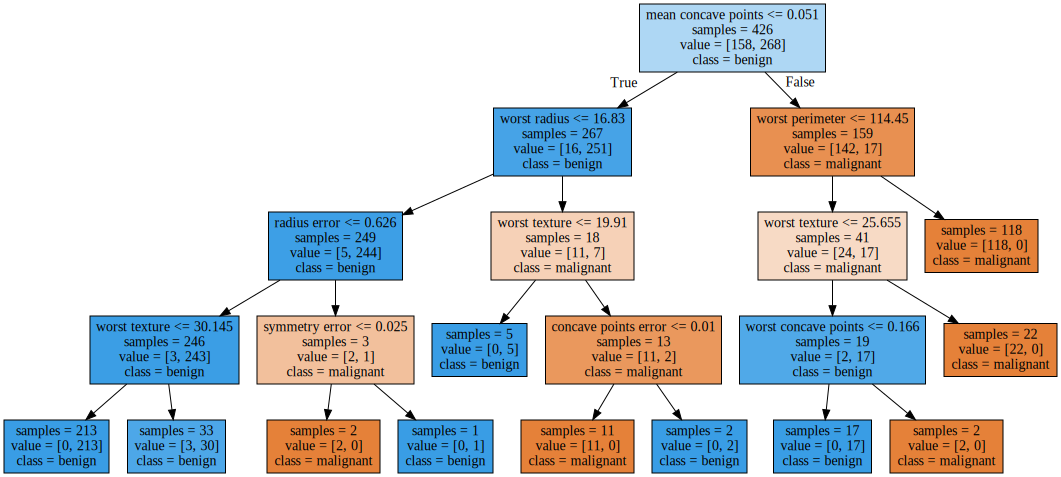

In [8]:
## we will use graphviz library to open tree.dot file 
with open('tree.dot') as f:
    dt_graph=f.read()
display(graphviz.Source(dt_graph))


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import  matplotlib.pyplot as plt

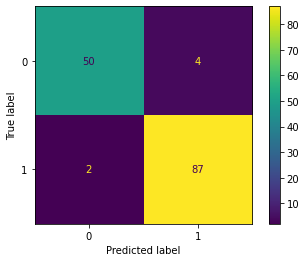

In [20]:
# let us make the prediction on X_test 
y_pred=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(cm)
cm_plot.plot()

In [14]:
print(classification_report(y_test,y_pred,target_names=['benign','malignant']))

              precision    recall  f1-score   support

      benign       0.96      0.93      0.94        54
   malignant       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



# Exercise For Students

In this exercise, we are going to import the wine datat from sklearn.datasets library. We have features for three different classes of wine. Create a model using decision tree and report the precision,recall and f1-score. Use max_depth=5,criterion= entropy and random_state=1000 for DecisionTreeClassifier object. Importing of the data has been done for you. 

Follow the follwing steps 
- Import the data
- split the data using train_test_split
- Create a model based on decision tre
- Feed your training data on different models

In [21]:
from sklearn.datasets import load_wine

In [22]:
wine_data=load_wine()

In [23]:
X_wine =wine_data.data
y_wine= wine_data.target

In [26]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])